In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections
import operator
import matplotlib.lines as mlines
from matplotlib.lines import Line2D  # for legend handle
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', 
    sep=',', 
    header=None,
    names=["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
          "body-style", "drive-wheels", "engine-location", "wheel-base", "length",
          "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
          "engine-size", "fuel-system", "bore", "stroke", "compression-ratio",
          "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"],
    na_values=['?'],
    dtype={"price":"float64"}
)

# calculate new variable: convex-volume

df['convex-volume'] = df['length'] * df['width'] * df['height']
#plt.hist(df['convex-volume'])
#plt.show()

makes = collections.Counter(df['make'])
makes_title_case = [x.title() for x in list(dict(sorted(makes.items(),key=operator.itemgetter(1), reverse=True)).keys())]
makes_title_case = list(map(lambda x: x.replace('Bmw', 'BMW'), makes_title_case))

# categorize cars by frequency of make in data set such that
# common_make = True if make has frequency > 10
# common_make = False if make has frequency <= 10

common_makes = df['make'].value_counts() > 10
common_makes = common_makes[common_makes == True].index.values
#len(common_makes[df_common_make == True])
df_common_makes = df[df['make'].isin(common_makes)]
df_1 = df.copy()
df_1['common-make'] = df_1['make'].isin(common_makes)

df_1['all'] = ""

# subset df_1 to include only cars from top 5 most common makes
df_top5_makes = df_1[df_1['make'].isin(common_makes[0:5])].reset_index()

#print(df_top5_makes['make'].value_counts(),"\n-------------------------")
#print(df_top5_makes['body-style'].value_counts())

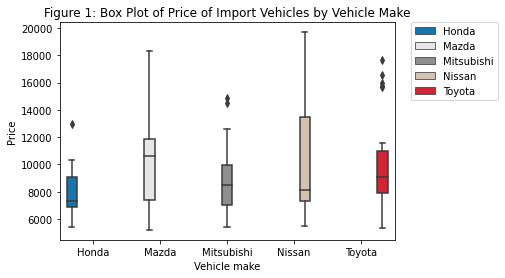

In [3]:
# boxplot of price for top 5 makes
df_top5_makes['make'] = df_top5_makes['make'].apply(lambda x:x.title())
colors = {'toyota'.title():'#eb0a1e',
          'nissan'.title():'#d9c2ab',
          'mazda'.title():'#e6e6e6',
          'honda'.title():'#007cc3',
          'mitsubishi'.title():'#8e8e8e'}
ax = sns.boxplot(data = df_top5_makes, y = 'price', x = 'make', hue='make', palette=colors).set(title='Figure 1: Box Plot of Price of Import Vehicles by Vehicle Make',
                                                                   xlabel='Vehicle make', ylabel='Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Text(0.5, 1.0, 'Figure 2: Price vs Horsepower of Import Vehicles')

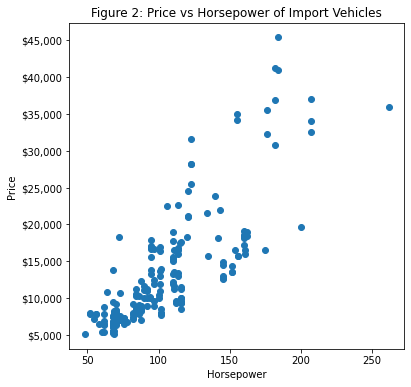

In [4]:
# scatter plot of price and horsepower
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(df_1['horsepower'], df_1['price'])
plt.xlabel("Horsepower")
plt.ylabel("Price")
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.title('Figure 2: Price vs Horsepower of Import Vehicles')

[Text(1, 5118.0, '$5118.0'), Text(1, 45400.0, '$45400.0')]

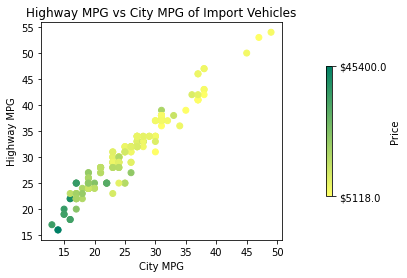

In [5]:
# scatter plot of city-mpg vs highway-mpg vs price
fig, ax = plt.subplots()
im = ax.scatter(data=df_1, x='city-mpg', y='highway-mpg', c = 'price',
            cmap = 'summer_r')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title("Figure 3: Highway MPG vs City MPG of Import Vehicles")
cbar = fig.colorbar(im, ticks = [min(df_1['price']), max(df_1['price'])], fraction = 0.15, shrink = 0.6, pad = 0.13,
                   label='Price')
cbar.ax.set_yticklabels(['$'+str(min(df_1['price'])),  '$'+str(max(df_1['price']))]) # vertically oriented colorbar